# 멜론 해외 차트 발매년도 분석 및 시각화 (2021-2023)

## 01 패키지 설치

In [1]:
!pip install koreanize-matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import koreanize_matplotlib

## 02 멜론 2021 해외 차트


In [20]:
df_21 = pd.read_csv('/content/멜론_pop_top30_2021_20240710.csv')
df_21.columns = ['title', 'singer', 'date']
df_21['year'] = df_21['date'].str[:4].astype(int)
df_21['chart_year'] = 2021
year_df_21 = df_21.groupby('year', as_index=False).agg(n=('year', 'count'))
year_df_21

,year,n
0,2014,2
1,2015,1
2,2017,2
3,2018,3
4,2019,8
5,2020,7
6,2021,6
7,2022,1


### 2021년 차트인데 2022년에 발매된 노래가 있는 이유

In [21]:
df_21

,title,singer,date,year,chart_year
0,19금 Peaches (Feat. Daniel Caesar & Giveon),Justin Bieber,2021.10.08,2021,2021
1,Savage Love (Laxed - Siren Beat) (BTS Remix),"Jawsh 685, Jason Derulo, 방탄소년단",2020.10.02,2020,2021
2,STAY,"The Kid LAROI, Justin Bieber",2021.07.09,2021,2021
3,2002,Anne-Marie,2018.08.03,2018,2021
4,12:45 (Stripped),Etham,2018.10.26,2018,2021
5,Memories,Maroon 5,2019.09.20,2019,2021
6,Dance Monkey,Tones And I,2019.08.09,2019,2021
7,Off My Face,Justin Bieber,2021.10.08,2021,2021
8,Bad Habits,Ed Sheeran,2021.10.25,2021,2021
9,Paris in the Rain,Lauv,2018.10.08,2018,2021


Snowman 싱글 발매일:
2017.11.11

In [ ]:
# 0 넣어주기
# df: groupby year
def fill_years(df):
  start_year = df['year'].iloc[0]
  end_year = df['year'].iloc[-1]
  idx = 0

  for i in range(start_year, end_year + 1):
    if df['year'].iloc[idx] != i:
      df.loc[len(df)] = {'year': i, 'n': 0}
    else:
      idx += 1

  df = df.sort_values('year', ascending=True)

  return df

# df columns [year, n]
def since_column(df, year):
  df['since'] = year - df['year']
  df['since'] = np.where(df['since'] == 0, '당해', df['since'].astype(str) + '년 전')
  return df

In [22]:
year_df_21 = fill_years(year_df_21)
year_df_21 = since_column(year_df_21, 2021)
year_df_21

,year,n,since
0,2014,2,7년 전
1,2015,1,6년 전
8,2016,0,5년 전
2,2017,2,4년 전
3,2018,3,3년 전
4,2019,8,2년 전
5,2020,7,1년 전
6,2021,6,당해
7,2022,1,-1년 전


In [23]:
fig = px.pie(year_df_22, names='since', values='n', title="2022년 멜론 해외 차트 - 발매년도에 따른 분석")
fig.update_traces(textinfo='label+percent')
fig.show()

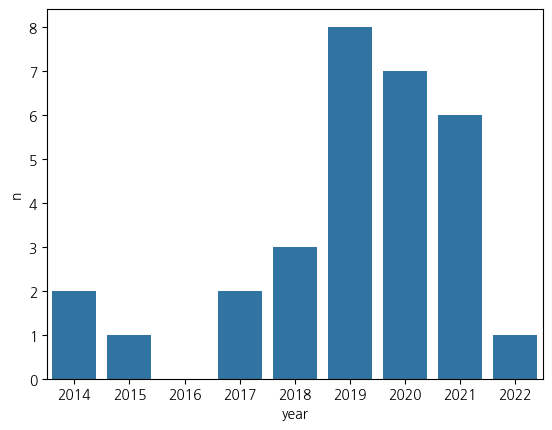

In [24]:
sns.barplot(year_df_21, x='year', y='n')

plt.show()

## 03 멜론 2022 해외 차트

In [29]:
df_22 = pd.read_csv('/content/멜론_pop_top30_2022_20240710.csv')
df_22

,노래제목,가수,발매일
0,STAY,"The Kid LAROI, Justin Bieber",2021.07.09
1,That's Hilarious,Charlie Puth,2022.10.07
2,Off My Face,Justin Bieber,2021.10.08
3,19금 abcdefu,GAYLE,2021.08.13
4,My Universe,"Coldplay, 방탄소년단",2021.09.24
5,Bad Habits,Ed Sheeran,2021.10.25
6,Left and Right (Feat. Jung Kook of BTS),"Charlie Puth, 정국, 방탄소년단",2022.06.24
7,Snowman,Sia,2022.12.30
8,2002,Anne-Marie,2018.08.03
9,Stronger (What Doesn't Kill You),Kelly Clarkson,2012.02.06


In [15]:
df_22 = pd.read_csv('/content/멜론_pop_top30_2022_20240710.csv')
df_22.columns = ['title', 'singer', 'date']

df_22['year'] = df_22['date'].str[:4].astype(int)
df_22['chart_year'] = 2022

# 연도로 그룹화
year_df_22 = df_22.groupby('year', as_index=False).agg(n=('year', 'count'))
year_df_22

,year,n
0,2012,1
1,2014,2
2,2015,1
3,2016,1
4,2017,1
5,2018,3
6,2019,4
7,2020,2
8,2021,8
9,2022,6


In [16]:
# 빈 연도 채우기
year_df_22 = fill_years(year_df_22)
year_df_22

,year,n
0,2012,1
11,2013,0
1,2014,2
2,2015,1
3,2016,1
4,2017,1
5,2018,3
6,2019,4
7,2020,2
8,2021,8


**Tiny Riot이 포함된 EP 발매일: 2021.09.24**
<br>**Tiny Riot이 포함된 정규앨범 발매일: 2023.01.01**

In [17]:
# 몇 년 전 발매인가
year_df_22 = since_column(year_df_22, 2022)
year_df_22

,year,n,since
0,2012,1,10년 전
11,2013,0,9년 전
1,2014,2,8년 전
2,2015,1,7년 전
3,2016,1,6년 전
4,2017,1,5년 전
5,2018,3,4년 전
6,2019,4,3년 전
7,2020,2,2년 전
8,2021,8,1년 전


In [18]:
fig = px.pie(year_df_22, names='since', values='n')
fig.update_traces(textinfo='label+percent')

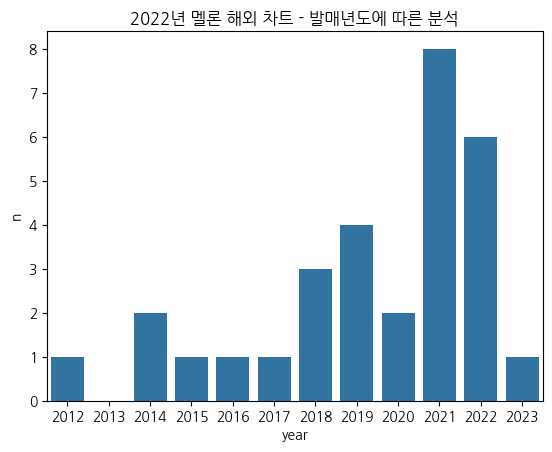

In [19]:
sns.barplot(year_df_22, x='year', y='n')
plt.title('2022년 멜론 해외 차트 - 발매년도에 따른 분석')

plt.show()

## 04 멜론 2023 해외 차트

In [3]:
df = pd.read_csv('/content/멜론_pop_top30_2023_20240710.csv')
df.columns = ['title', 'singer', 'date']
df['year'] = df['date'].str[:4].astype(int)
df['chart_year'] = 2022
year_df = df.groupby('year', as_index=False).agg(n=('year', 'count'))
year_df

,year,n
0,2014,1
1,2015,1
2,2016,2
3,2017,2
4,2018,4
5,2019,2
6,2021,7
7,2022,9
8,2023,2


In [4]:
df.head()

,title,singer,date,year,chart_year
0,I Don't Think That I Like Her,Charlie Puth,2022.10.07,2022,2022
1,Dangerously,Charlie Puth,2016.11.11,2016,2022
2,STAY,"The Kid LAROI, Justin Bieber",2021.07.09,2021,2022
3,That's Hilarious,Charlie Puth,2022.10.07,2022,2022
4,"Steal The Show (From ""Elemental"")",Lauv,2023.06.02,2023,2022


In [6]:
year_df = fill_years(year_df)
year_df

,year,n
0,2014,1
1,2015,1
2,2016,2
3,2017,2
4,2018,4
5,2019,2
9,2020,0
6,2021,7
7,2022,9
8,2023,2


In [7]:
# 몇 년 전인지
year_df['since'] = 2023 - year_df['year']
year_df

,year,n,since
0,2014,1,9
1,2015,1,8
2,2016,2,7
3,2017,2,6
4,2018,4,5
5,2019,2,4
9,2020,0,3
6,2021,7,2
7,2022,9,1
8,2023,2,0


In [9]:
year_df = since_column(year_df, 2023)

In [10]:
round(df['year'].mean())

2020

In [11]:
master_df = pd.concat([df])

In [12]:
fig = px.pie(year_df, names='since', values='n')
fig.update_traces(textinfo='label+percent')

In [13]:
px.bar(year_df, x='year', y='n', text_auto=True)

## 05 2021-2023 멜론 해외 차트 시각화

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def change_numpy(df):
  return (df['since'].to_numpy(), df['n'].to_numpy())

label23, value23 = change_numpy(year_df)
label22, value22 = change_numpy(year_df_22)
label21, value21 = change_numpy(year_df_21)

print(label23, value23)
print(label22, value22)
print(label21, value21)

['9년 전' '8년 전' '7년 전' '6년 전' '5년 전' '4년 전' '3년 전' '2년 전' '1년 전' '당해'] [1 1 2 2 4 2 0 7 9 2]
['10년 전' '9년 전' '8년 전' '7년 전' '6년 전' '5년 전' '4년 전' '3년 전' '2년 전' '1년 전'
 '당해' '-1년 전'] [1 0 2 1 1 1 3 4 2 8 6 1]
['7년 전' '6년 전' '5년 전' '4년 전' '3년 전' '2년 전' '1년 전' '당해' '-1년 전'] [2 1 0 2 3 8 7 6 1]


In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]],
                    subplot_titles=['2023 멜론 해외 차트', '2022 멜론 해외 차트',"2021 멜론 해외 차트"])

fig.add_trace(go.Pie(labels=label23, values=value23, name="2023 멜론 해외 차트"), row=1, col=1)
fig.add_trace(go.Pie(labels=label22, values=value22, name="2022 멜론 해외 차트"), row=1, col=2)
fig.add_trace(go.Pie(labels=label21, values=value21, name="2021 멜론 해외 차트"), row=1, col=3)

fig.update_traces(textinfo='label+percent')
fig.show()

##

# 멜론 Top 30 차트 가수 빈도수 분석 (2016-2018, 2022-2023)

## 2016 국내 차트 TOP 30 - 가수의 등장 빈도

In [43]:
df = pd.read_csv('/content/멜론 TOP30 2016_20240710.csv')

# 가수 열 추출
singers = df['가수']

# 가수별 빈도 계산 후 내림차순 정렬
singer_counts = df['가수'].value_counts().reset_index()
singer_counts.columns = ['가수', '빈도수']
singer_counts = singer_counts.sort_values(by='빈도수', ascending=False)

# 정렬된 데이터를 기준으로 히스토그램 그리기
fig = px.histogram(singer_counts, x='가수', y='빈도수', title='가수의 빈도수 내림차순',
                   labels={'가수':'가수', '빈도수':'빈도수'},
                   color_discrete_sequence=['skyblue'])

fig.update_yaxes(dtick=1)

# 그래프 표시
fig.show()

## 2017 국내 차트 TOP 30 - 가수의 등장 빈도

In [32]:
df = pd.read_csv('/content/멜론 2017년 TOP30_20240710.csv')

In [33]:
import plotly.express as px
import pandas as pd

# 가수 열 추출
singers = df['가수']

# 가수별 빈도 계산 후 내림차순 정렬
singer_counts = df['가수'].value_counts().reset_index()
singer_counts.columns = ['가수', '빈도수']
singer_counts = singer_counts.sort_values(by='빈도수', ascending=False)

# 정렬된 데이터를 기준으로 히스토그램 그리기
fig = px.histogram(singer_counts, x='가수', y='빈도수', title='가수의 빈도수 내림차순',
                   labels={'가수':'가수', '빈도수':'빈도수'},
                   color_discrete_sequence=['skyblue'])

fig.update_yaxes(dtick=1)

# 그래프 표시
fig.show()

## 2018 국내 차트 TOP 30 - 가수의 등장 빈도

In [45]:
df = pd.read_csv('/content/멜론2018년 TOP30_2024-07-10.csv')

# 가수 열 추출
singers = df['가수']

# 가수별 빈도 계산 후 내림차순 정렬
singer_counts = df['가수'].value_counts().reset_index()
singer_counts.columns = ['가수', '빈도수']
singer_counts = singer_counts.sort_values(by='빈도수', ascending=False)

# 정렬된 데이터를 기준으로 히스토그램 그리기
fig = px.histogram(singer_counts, x='가수', y='빈도수', title='가수의 빈도수 내림차순',
                   labels={'가수':'가수', '빈도수':'빈도수'},
                   color_discrete_sequence=['skyblue'])

fig.update_yaxes(dtick=1)
# 그래프 표시
fig.show()

## 2022 국내 차트 TOP 30 - 가수의 등장 빈도
### "걸그룹 전성시대와 리메이크·역주행의 향연: 멜론 Top 30 장악"(2022년)

In [36]:
df = pd.read_csv('/content/멜론 TOP30 2022_20240710.csv')

# 가수 열 추출
singers = df['가수']

# 가수별 빈도 계산 후 내림차순 정렬
singer_counts = df['가수'].value_counts().reset_index()
singer_counts.columns = ['가수', '빈도수']
singer_counts = singer_counts.sort_values(by='빈도수', ascending=False)

# 정렬된 데이터를 기준으로 히스토그램 그리기
fig = px.histogram(singer_counts, x='가수', y='빈도수', title='가수의 빈도수 내림차순',
                   labels={'가수':'가수', '빈도수':'빈도수'},
                   color_discrete_sequence=['skyblue'])

fig.update_yaxes(dtick=1)

# 그래프 표시
fig.show()

## 2023 국내 차트 TOP 30 - 가수의 등장 빈도

In [47]:
df = pd.read_csv('/content/멜론 2023년 TOP30_20240710.csv')

# 가수 열 추출
singers = df['가수']

# 가수별 빈도 계산 후 내림차순 정렬
singer_counts = df['가수'].value_counts().reset_index()
singer_counts.columns = ['가수', '빈도수']
singer_counts = singer_counts.sort_values(by='빈도수', ascending=False)

# 정렬된 데이터를 기준으로 히스토그램 그리기
fig = px.histogram(singer_counts, x='가수', y='빈도수', title='가수의 빈도수 내림차순',
                   labels={'가수':'가수', '빈도수':'빈도수'},
                   color_discrete_sequence=['skyblue'])

fig.update_yaxes(dtick=1)

# 그래프 표시
fig.show()